In [16]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

<h1>Theoretical time complexity of Dijkstra's Algorithm with graph being represented as an adjacency matrix and priority queue as an unordered list (normal array)</h1>

Assuming given graph is G = (V, E)

Step 1: Check all find and select a unvisited vertex with the smallest path. Require O(V) time to check all the vertices <br>
Step 2: At the new vertex, need to update a neighbour path of this new vertex to the smaller value between its current path or to the newly found. Takes O(1) time. <br>
Step 3: Do Step 2 for all the neighbours of the new vertex, and each vertex can have at most V-1 neighours, so total time becomes O(V) * O(1) = O(V)

Time Complexity Analysis <br>
Time to visit all vertices = O(V) <br>
Time to process one vertex = O(V) <br>
Therefore, total time complexity to vist and process all vertices -> O(V) * O(V) = O(V^2)

Example of Dijkstra's Algorithm Implementation
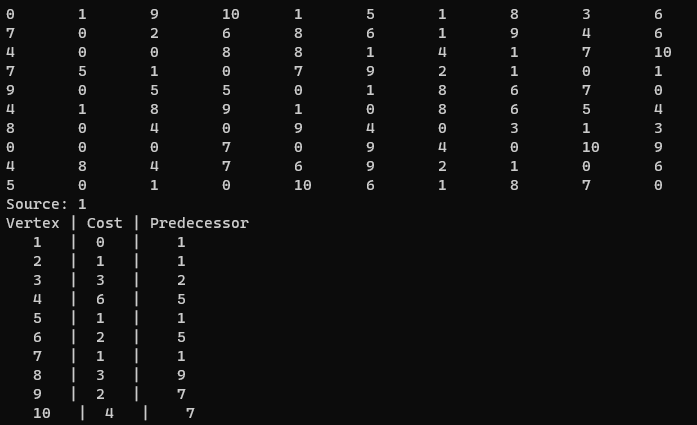

Next, collecting empirical results.

We will be collecting the run time for Dijkstra's Algorithm. So we will generate graph ranging from 100 to 4000 vertices with interval of 100. For each size, we will be generating 5 different graphs and collecting 5 timings and taking the average

In [17]:
results1 = pd.read_csv("lab2_result_1.csv")
#Theoretical Time Complexity for Dijkstra's with Adj Matrix
results1["O(V^2)"] = results1["Vertices"] ** 2
results1.head(10)

,Vertices,Time 1,Time 2,Time 3,Time 4,Time 5,Average Time,O(V^2)
0,100,0.000,0.000,0.000,0.000,0.000,0.0000,10000
1,200,0.000,0.000,0.000,0.000,0.000,0.0000,40000
2,300,0.003,0.000,0.000,0.000,0.000,0.0006,90000
3,400,0.000,0.000,0.000,0.000,0.000,0.0000,160000
4,500,0.006,0.004,0.000,0.000,0.000,0.0020,250000
5,600,0.000,0.005,0.001,0.000,0.000,0.0012,360000
6,700,0.000,0.003,0.007,0.005,0.011,0.0052,490000
7,800,0.004,0.001,0.000,0.000,0.000,0.0010,640000
8,900,0.002,0.005,0.011,0.005,0.012,0.0070,810000
9,1000,0.005,0.006,0.005,0.006,0.013,0.0070,1000000


So in order to determine whether our algorithm implementation is accurate, we will first plot a graph of average timing against vertices and compare it with the time complexity against vertices. 

<AxesSubplot: xlabel='Vertices', ylabel='Average Time'>

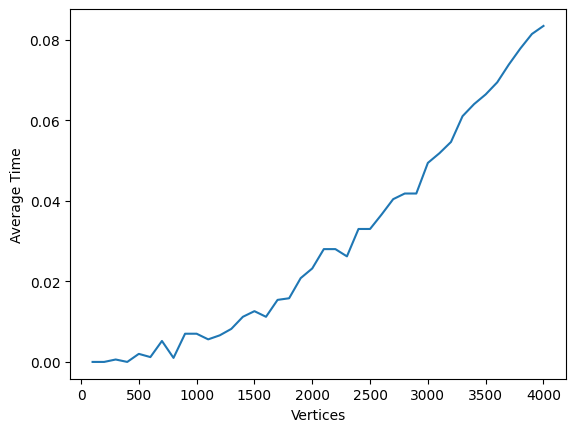

In [18]:
empirical_results1 = results1[['Vertices', 'Average Time']]
sb.lineplot(x = "Vertices",
            y = "Average Time",
            data = empirical_results1)

#Graph of average timiing against vertices

<AxesSubplot: xlabel='Vertices', ylabel='O(V^2)'>

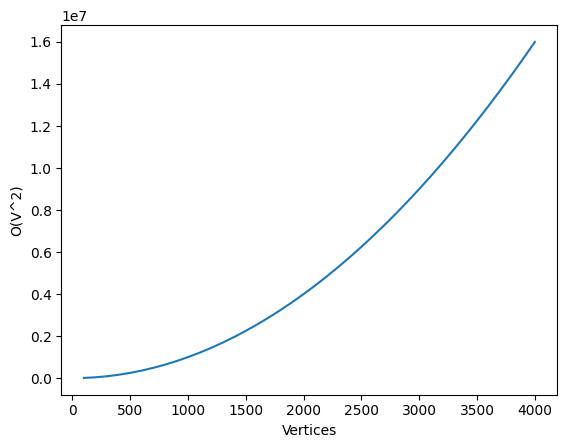

In [19]:
theoretical_results = results1[["Vertices", "O(V^2)"]]
sb.lineplot(x = "Vertices",
            y = "O(V^2)",
            data = theoretical_results)

#Graph of time complexity O(V^2) against vertices

As we can see from the 2 graphs, the shape of the two graphs is very similar. So next we will check the correlation between time complexity and average run time of our implementation

In [20]:
correlation = np.corrcoef(results1['Average Time'], results1['O(V^2)'])[0, 1]
print(correlation)

0.998111848315883


Since the correlation of 0.998 is extremely close to 1, this suggests that there is almost a perfect linear relationship between average run time of our implementation and the theoretical time complexity.

This sugggests to us that our implementation is more likely to be correct.

# will include theoretical time complexity of adj list later.

Next, collecting empirical results.

We will be collecting the run time for Dijkstra's Algorithm. So we will generate graph ranging from 100 to 4000 vertices with interval of 100. For each size, we will be generating 5 different graphs and collecting 5 timings and taking the average

In [21]:
results2 = pd.read_csv("lab2_result_2.csv")
#Theoretical Time Complexity for Dijkstra's with Adj List and min heap
results2["O((E+V)log(V))"] = (results2["Vertices (V)"] + results2["Edges (E)"]) * np.log(results2["Vertices (V)"])
results2.head(10)

,Vertices (V),Edges (E),Time 1,Time 2,Time 3,Time 4,Time 5,Average Time,O((E+V)log(V))
0,100,9900,0.000,0.000,0.000,0.000,0.000,0.0000,4.605170e+04
1,200,39800,0.000,0.000,0.000,0.000,0.000,0.0000,2.119327e+05
2,300,89700,0.000,0.000,0.002,0.000,0.003,0.0010,5.133404e+05
3,400,159600,0.000,0.001,0.005,0.000,0.002,0.0016,9.586343e+05
4,500,249500,0.000,0.001,0.007,0.004,0.002,0.0028,1.553652e+06
5,600,359400,0.001,0.000,0.000,0.000,0.001,0.0004,2.302895e+06
6,700,489300,0.008,0.007,0.006,0.001,0.010,0.0064,3.210029e+06
7,800,639200,0.002,0.007,0.003,0.006,0.009,0.0054,4.278152e+06
8,900,809100,0.009,0.003,0.012,0.006,0.013,0.0086,5.509940e+06
9,1000,999000,0.008,0.011,0.009,0.009,0.005,0.0084,6.907755e+06


So in order to determine whether our algorithm implementation is accurate, we will first plot a graph of average timing against vertices and compare it with the time complexity against vertices. 

<AxesSubplot: xlabel='Vertices (V)', ylabel='Average Time'>

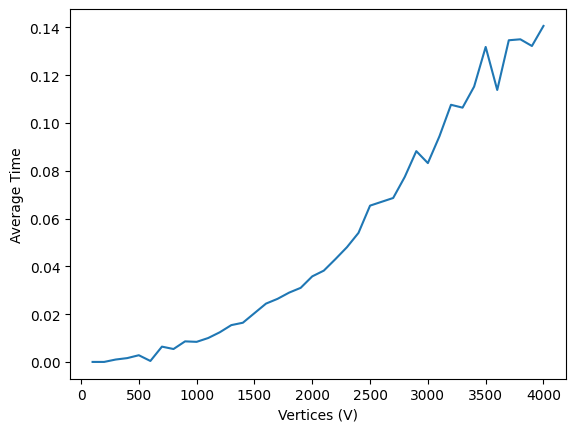

In [22]:
empirical_results2 = results2[['Vertices (V)', 'Average Time']]
sb.lineplot(x = "Vertices (V)",
            y = "Average Time",
            data = empirical_results2)

#Graph of average timiing against vertices

<AxesSubplot: xlabel='Vertices (V)', ylabel='O((E+V)log(V))'>

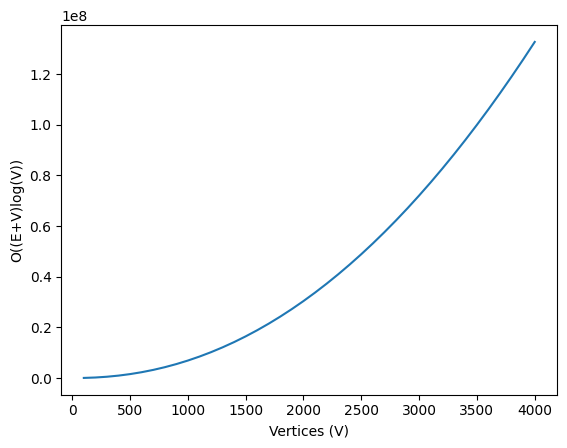

In [23]:
theoretical_results = results2[["Vertices (V)", "O((E+V)log(V))"]]
sb.lineplot(x = "Vertices (V)",
            y = "O((E+V)log(V))",
            data = theoretical_results)

#Graph of time complexity O((E+V)log(V)) against vertices

As we can see from the 2 graphs, the shape of the two graphs is very similar. So next we will check the correlation between time complexity and average run time of our implementation

In [24]:
correlation = np.corrcoef(results2['Average Time'], results2['O((E+V)log(V))'])[0, 1]
print(correlation)

0.9934091368176414


Since the correlation of 0.993 is extremely close to 1, this suggests that there is almost a perfect linear relationship between average run time of our implementation and the theoretical time complexity.

This suggests to us that our implementation is more likely to be correct.

<h1>(c) Compare the two implementations in (a) and (b). Discuss which implementation is better and in what circumstances.</h1>

From the theoretical time complexity analysis in part 1 and 2, we know that Dijkstra with Adjacency Matrix only gets affected by the number of vertices, whereas Dijkstra with Adjacency List and min heap gets affected by both edges and vertices.

This suggests that we have to explore how different graph density will affect the run time of Dijkstra's Algorithm. So, we will proceed to collect run time of a graph of 2000 vertex but with a range of edges.

Maximum Number of Edges = 2000 * 1999 = 3,998,000 <br>
[1,000,000 ~ 3,998,000] intervals of 20,000

In [25]:
results3 = pd.read_csv("lab2_result_4.csv")
results3.head()

,Vertices (V),Edges (E),Time 1,Time 2,Time 3,Time 4,Time 5,Average Time
0,2000,999500,0.082,0.091,0.091,0.078,0.080,0.0844
1,2000,1019500,0.081,0.082,0.088,0.081,0.081,0.0826
2,2000,1039500,0.085,0.082,0.080,0.084,0.081,0.0824
3,2000,1059500,0.090,0.095,0.085,0.087,0.095,0.0904
4,2000,1079500,0.086,0.090,0.085,0.081,0.086,0.0856


<AxesSubplot: xlabel='Edges (E)', ylabel='Average Time'>

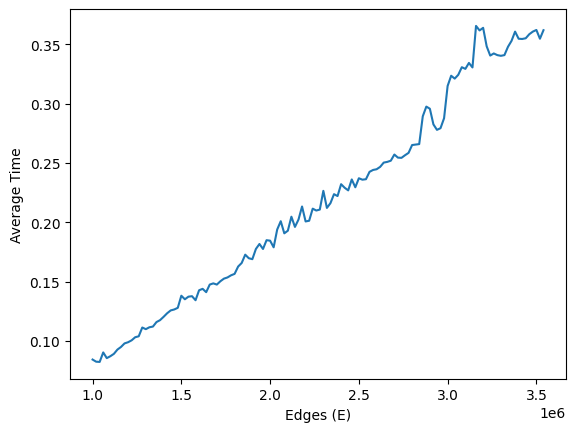

In [26]:
sb.lineplot(x = "Edges (E)",
            y = "Average Time",
            data = results3)

As we can see from the graph, as edges increases, the run time of dijkstra's algorithm also increased

We have also collected the run time Dijkstra's Algorithm on a sparse, moderate and dense graph. <br>
Sparse -> 25% of max edges (25% of V^2) <br>
Moderate -> 50% <br>
Dense -> 75%

In [27]:
sparse = pd.read_csv("lab2_result_3(.25).csv")
moderate = pd.read_csv("lab2_result_3(.5).csv")
dense = pd.read_csv("lab2_result_3(.75).csv")

<AxesSubplot: xlabel='Vertices (V)', ylabel='Average Time'>

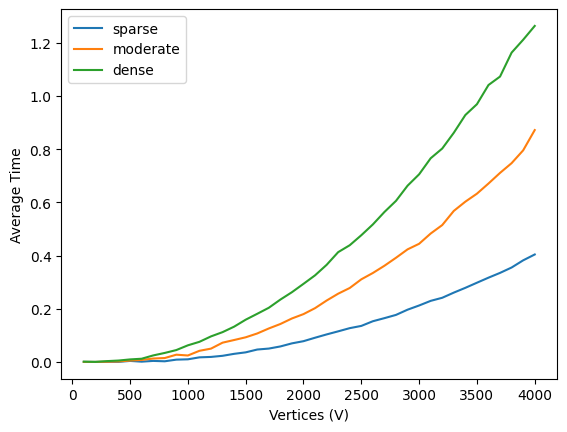

In [30]:
sb.lineplot(x = "Vertices (V)",
            y = "Average Time",
            label = "sparse",
            data = sparse)
sb.lineplot(x = "Vertices (V)",
            y = "Average Time",
            label = "moderate",
            data = moderate)
sb.lineplot(x = "Vertices (V)",
            y = "Average Time",
            label = "dense",
            data = dense)

So, as we can see from the graph, when the vertices are small, the density of the graph does not really affect the run time of the algorithm. However, as vertices increases, the denser a graph, the faster the run time will rise.

Using the initial data collected from part 1 and 2, we compare both implementation of dijkstra's algorithm performance on a complete graph.

<AxesSubplot: xlabel='Vertices', ylabel='Average Time'>

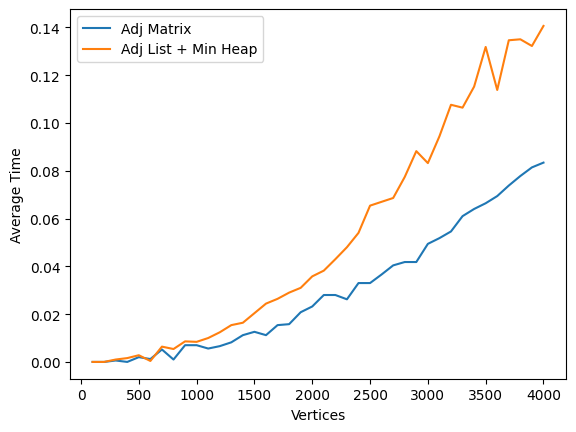

In [29]:
sb.lineplot(x = "Vertices",
            y = "Average Time",
            label = "Adj Matrix",
            data = empirical_results1)
sb.lineplot(x = "Vertices (V)",
            y = "Average Time",
            label = "Adj List + Min Heap",
            data = empirical_results2)

So as we can see, on a complete graph, dijkstra with adjacency matrix actually performs better than adjacency list and min heap. <br>
A possible reason as to why adjacency matrix performs better is that in a complete graph, the number of heap operations that need to be done is alot since we have to consider all posible edges. And performing so many heap operations can be more time-consuming than accessing the weight of any edge between two vertices in an adjacency matrix which happens in constant time.

To conclude

1. When number of vertices in graph is small, which implementation to use does not matter as much
2. When number of vertices in graph is big, but graph density is low, use dijkstra's algorithm with adjacency list with min heap
3. When number of vertices in graph is big, but graph density is high, use dijkstra's algorithm with adjacency matrix